## Introduction
In this task, we explored the K-Nearest Neighbors (KNN) algorithm using the Iris dataset. KNN is a simple yet powerful classification technique that assigns labels based on the most common class among the K nearest data points. We used only two features (sepal_length and petal_length) for better visualization, normalized the data, experimented with various values of K, and visualized decision boundaries. We also applied cross-validation to ensure robust model performance.

## Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Load and Normalize Dataset

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
from sklearn.preprocessing import LabelEncoder

# Convert species to numeric labels (0, 1, 2)
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
x=df.drop('species',axis=1)
y=df['species']

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled , y, test_size=0.2, random_state=42)

In [39]:
from sklearn.model_selection import cross_val_score

## Fit KNN with Different K Values

In [40]:
k_range = range(1,11)
cv_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_scaled, y, cv=5)
    cv_scores.append(np.mean(scores))
    print(f"K={k} | Cross-Validated Accuracy: {np.mean(scores):.2f}")


K=1 | Cross-Validated Accuracy: 0.95
K=2 | Cross-Validated Accuracy: 0.95
K=3 | Cross-Validated Accuracy: 0.95
K=4 | Cross-Validated Accuracy: 0.95
K=5 | Cross-Validated Accuracy: 0.96
K=6 | Cross-Validated Accuracy: 0.97
K=7 | Cross-Validated Accuracy: 0.95
K=8 | Cross-Validated Accuracy: 0.97
K=9 | Cross-Validated Accuracy: 0.96
K=10 | Cross-Validated Accuracy: 0.96


## Plot cross_val_score vs K

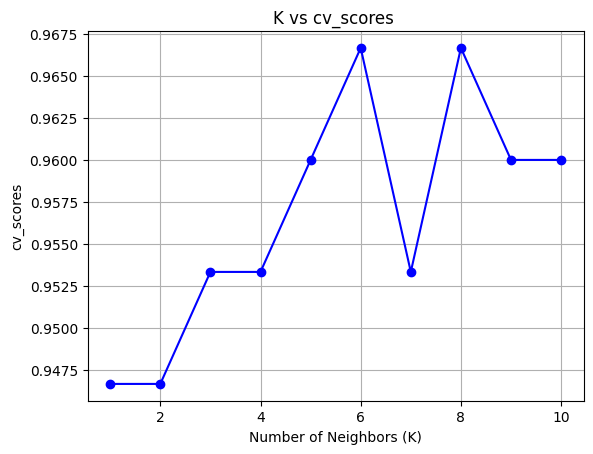

In [41]:
plt.plot(k_range,cv_scores , marker='o', color='blue')
plt.title("K vs cv_scores ")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("cv_scores")
plt.grid(True)
plt.show()


 ## Evaluate Best Model

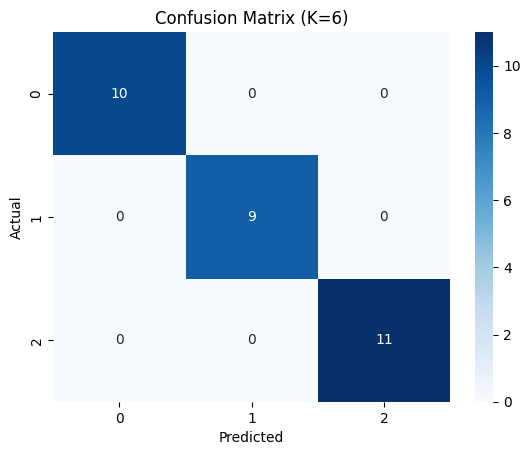

In [42]:
best_k =cv_scores.index(max(cv_scores)) + 1
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_final_pred = knn_best.predict(X_test)


cm = confusion_matrix(y_test, y_final_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix (K={best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
# Classification report
print(classification_report(y_test, y_final_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Visualize Decision Boundaries (for 2 features)

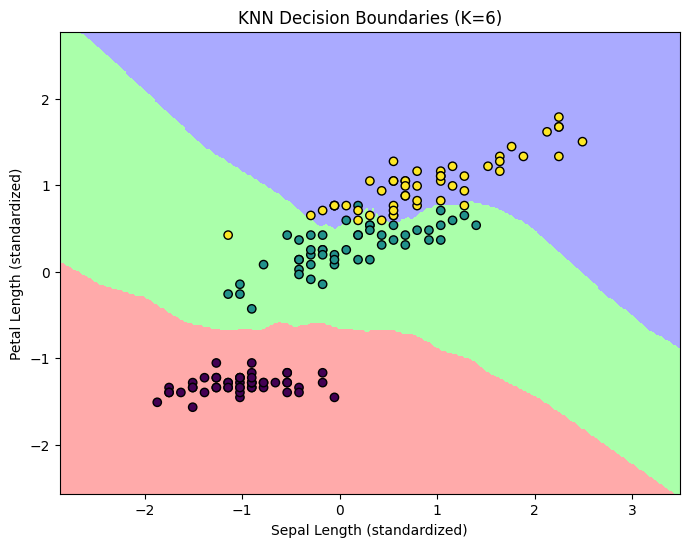

In [45]:
# Use only 2 features for visualization
X_vis = df[['sepal_length', 'petal_length']]
y_vis = df['species']

# Normalize
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

# Fit KNN
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis_scaled, y_vis)

# Plot decision boundary
from matplotlib.colors import ListedColormap

h = .02
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_background)

plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, edgecolor='k', cmap='viridis')
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Petal Length (standardized)")
plt.title(f"KNN Decision Boundaries (K={best_k})")
plt.show()



## Conclusion
KNN performed extremely well on the Iris dataset, achieving high accuracy across all tested K values. By using cross-validation, we ensured that our model’s accuracy was not just a fluke from one test split. The decision boundary plot gave a clear visual representation of how KNN makes decisions. This task strengthened our understanding of instance-based learning, feature scaling, and the impact of K in KNN.